In [9]:


pip install pandas geopandas matplotlib


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/90/37/08e416c9915dcf7d53deb0fbdb702266902c584617dfa6e6c84fb2fc6ee3/geopandas-0.14.3-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/27/b24c1610c7ae5716709321f04d38d7b8b71ed531f80df4f697b9ad99cfc3/fiona-1.9.5-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     ------------------------------ ------- 41.0/51.1 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 869.6 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/29/cd/763817c27e6cb6d04ffd477a5dcdfdd71b

In [10]:
#GeoPandas approach



import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


In [14]:

# Load airports data 
airports = pd.read_csv(r"C:\Users\Draeger\Documents\group_03\downloads\airports.csv") # need to adapt
airports.head(5)



,index,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


C:\Users\Draeger\AppData\Local\Temp\ipykernel_15684\3610643548.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


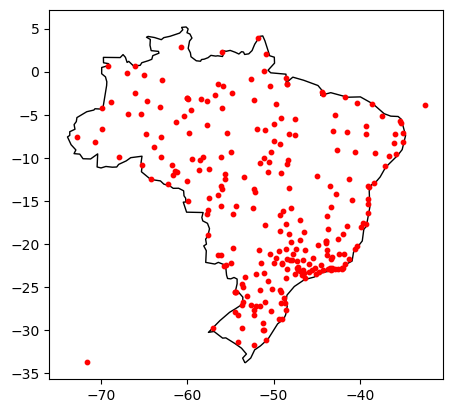

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_airports_by_country(airports, country_name):
    # Filter airports by the specified country
    country_airports = airports[airports['Country'] == country_name]
    
    # Check if any airports found
    if country_airports.empty:
        return "Error: Country not found or no airports available for this country."
    
    # Convert DataFrame to GeoDataFrame
    gdf = gpd.GeoDataFrame(
        country_airports, 
        geometry=gpd.points_from_xy(country_airports.Longitude, country_airports.Latitude)
    )
    
    # Load world map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    country_map = world[world.name == country_name]
    
    # Plotting
    fig, ax = plt.subplots()
    country_map.plot(ax=ax, color='white', edgecolor='black')
    gdf.plot(ax=ax, color='red', markersize=10)
    plt.show()

# Example usage, assuming 'airports' is a DataFrame with the necessary data
plot_airports_by_country(airports, 'Brazil')
